In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Anil\Projects\DS Training\placement.csv')

In [3]:
    df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


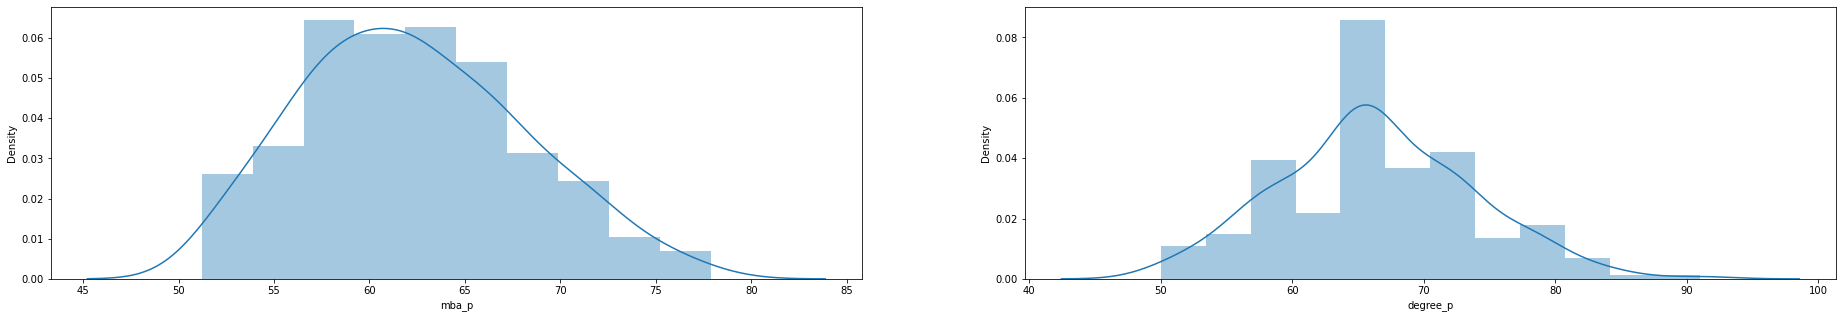

In [18]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(32,5))
plt.subplot(1,2,1)
sns.distplot(df['mba_p'])
plt.subplot(1,2,2)
sns.distplot(df['degree_p'])
plt.show()


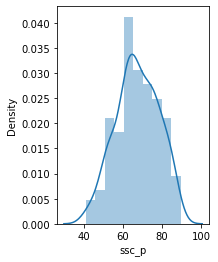

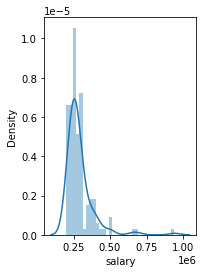

In [19]:
plt.subplot(1,2,1)
sns.distplot(df['ssc_p'])
plt.show()
plt.subplot(1,2,2)
sns.distplot(df['salary'])
plt.show()

In [20]:
print("Highest allowed",df['salary'].mean() + 3*df['salary'].std())
print("Lowest allowed",df['salary'].mean() - 3*df['salary'].std())

Highest allowed 569027.7626641716
Lowest allowed 8283.048146639136


# Trimming

In [30]:
df[(df['salary'] > 569027) | (df['salary'] < 8283.048)]

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
119,120,M,60.8,Central,68.40,Central,Commerce,64.6,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,569027.762664
150,151,M,71.0,Central,58.66,Central,Science,58.0,Sci&Tech,Yes,56.00,Mkt&Fin,61.30,Placed,569027.762664
177,178,F,73.0,Central,97.00,Others,Commerce,79.0,Comm&Mgmt,Yes,89.00,Mkt&Fin,70.81,Placed,569027.762664


In [31]:
new_df = df[(df['salary'] < 569027) | (df['salary'] > 8283.048)]


In [24]:
new_df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.0,Mkt&Fin,62.14,Placed,252000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,210,M,62.00,Central,72.00,Central,Commerce,65.00,Comm&Mgmt,No,67.0,Mkt&Fin,56.49,Placed,216000.0
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0


# Capping

In [25]:
upper_limit = df['salary'].mean() + 3*df['salary'].std()
lower_limit = df['salary'].mean() - 3*df['salary'].std()

In [26]:
upper_limit

569027.7626641716

In [28]:
df['salary'] = np.where(
    df['salary']>upper_limit,
    upper_limit,
    np.where(
        df['salary']<lower_limit,
        lower_limit,
        df['salary']
    )
)

In [29]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
90054

40059

In [89]:
a = sorted(list("90045"))

In [90]:
a

['0', '0', '4', '5', '9']

In [82]:
b

'9'

In [ ]:
a.pop()

In [91]:
b = 0
for i in range(len(a)):
    if int(a[i]) != 0:
        b = a.pop(i)
        break;


In [92]:
b

'4'

In [95]:
a

['4', '0', '0', '5', '9']

In [94]:
a.insert(0,b)

In [61]:
b = "".join(a)

In [88]:
a

['4', '0', '0', '5', '9']

In [62]:
b

'40059'

In [97]:
a = sorted(list(input("Enter input: ")))
b = 0
for i in range(len(a)):
    if int(a[i]) != 0:
        b = a.pop(i)
        break;

a.insert(0,b)
b = "".join(a)
print(int(b))

Enter input: 7891234
1234789
